In [1]:
%run C://Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
def two_point(k):
    a_x = np.random.randint((k-1)//2)*2
    a_y = np.random.randint((k-1)//2)*2
    b_x = np.random.randint((k-1)//2) * 2
    b_y = np.random.randint((k-1)//2) * 2
    while abs(b_x - a_x) < 10 :
        b_x = np.random.randint((k-1)//2) * 2

    while abs(b_y - a_y) < 10:
        b_y = np.random.randint((k-1)//2) * 2
        
    c_x = min(a_x,b_x)
    c_y = min(a_y,b_y)
    d_x = max(a_x,b_x)
    d_y = max(a_y,b_y)
    return (c_x, c_y, d_x, d_y)

def liner0(D, c_x,c_y,d_x,d_y):
    a = (c_y - d_y)/(d_x - c_x)

    for i in range (d_x - c_x):
        x = c_x + i
        y = int(c_y + a * (i))
        D[x][y] = 1

    for i in range (d_y - c_y):
        y = c_y + i
        x = int(c_x + (1./a) * (i))
        D[x][y] = 1
    return (D)



def liner(D, c_x,c_y,d_x,d_y):
    a = (d_y - c_y)/(d_x - c_x)

    for i in range (d_x - c_x):
        x = c_x + i
        y = int(c_y + a * (i))
        D[x][y] = 1

    for i in range (d_y - c_y):
        y = c_y + i
        x = int(c_x + (1./a) * (i))
        D[x][y] = 1
    return (D)

def liner_0(D, c_x,c_y,d_x,d_y):
    a = (d_y - c_y)/(d_x - c_x)

    for i in range (d_x - c_x):
        x = c_x + i
        y = int(c_y + a * (i))
        D[x][y] = 1

    for i in range (c_y - d_y):
        y = d_y + i
        x = int(d_x + (1./a) * (i))
        D[x][y] = 1
    return (D)

def liner_(D, c_x,c_y,d_x,d_y):
    a = (c_y - d_y)/(c_x - d_x)

    for i in range (c_x - d_x):
        x = d_x + i
        y = int(d_y + a * (i))
        D[x][y] = 1
   
    for i in range (c_y - d_y):
        y = d_y + i
        x = int(d_x + (1./a) * (i))
        D[x][y] = 1
    return(D)

def liner_1(D, c_x,c_y,d_x,d_y):
    a = (c_y - d_y)/(c_x - d_x)
    print(a)
    
    for i in range(c_x - d_x):
        x = d_x + i
        y = int (d_y + a * i)
        D[x][y] = 1 
    for i in range(d_y - c_y):
        y = d_y - i
        x = int (d_x - 1./a * i)
        D[x][y] = 1     
        
        
    return(D)


def zeros(k):
    mat = np.zeros((k,k))
    return (mat)

In [3]:
def diamond(k):
    
    D = zeros(k)
    aa_x, aa_y, bb_x, bb_y = two_point(k)
    a_x = aa_x
    a_y = (aa_y + bb_y) // 2
    b_x = (aa_x + bb_x ) // 2 
    b_y = bb_y
    c_x = bb_x
    c_y = (aa_y + bb_y) // 2
    d_x = (aa_x + bb_x ) // 2 
    d_y = aa_y
    
    A = liner(D, a_x, a_y, b_x, b_y)

    B = liner(A, b_x, b_y, c_x, c_y)

    C = liner_(B, c_x, c_y, d_x, d_y)
    E = liner_(C, d_x, d_y, a_x, a_y)
    
    return E


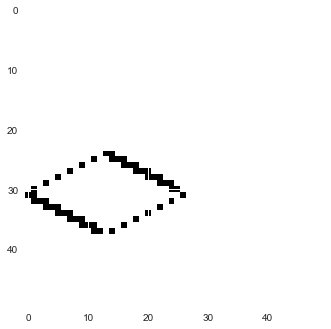

In [6]:
plt.imshow(diamond(50))
plt.show()

-1.1111111111111112


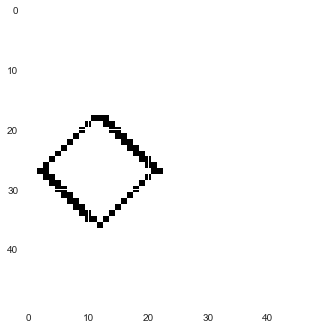

In [18]:
def diamond_0(k):
    D = zeros(k)
    aa_x, aa_y, bb_x, bb_y = two_point(k)
    a_x = aa_x
    a_y = (aa_y + bb_y) // 2
    b_x = (aa_x + bb_x ) // 2 
    b_y = bb_y
    c_x = bb_x
    c_y = (aa_y + bb_y) // 2
    d_x = (aa_x + bb_x ) // 2 
    d_y = aa_y
    
    A = liner(D, a_x, a_y, b_x, b_y)
    B = liner_0(A, b_x, b_y, c_x, c_y)
    C = liner_(B, c_x, c_y, d_x, d_y)
    E = liner_1(C, d_x, d_y, a_x, a_y)
    return (E)  

plt.imshow(diamond_0(50))

plt.show()

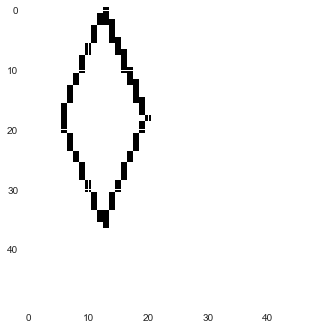

In [137]:
D = np.arange(5000*50*50).reshape(5000,50,50)
for i in range (5000):
    D[i] = diamond_0(50)


-1.2
-0.5
-1.2
-3.0
-1.0
-2.125
-0.6153846153846154
-1.6
-0.6363636363636364
-1.5384615384615385
-0.7692307692307693
-1.2
-1.25
-0.2777777777777778
-0.6363636363636364
-0.5
-1.4
-2.111111111111111
-2.3333333333333335
-1.3333333333333333
-1.75
-3.3333333333333335
-1.6666666666666667
-1.3333333333333333
-0.45454545454545453
-0.8461538461538461
-1.0
-0.8888888888888888
-2.7142857142857144
-0.6111111111111112
-1.4
-1.2
-0.3333333333333333
-0.875
-0.8571428571428571
-1.25
-1.8333333333333333
-1.0
-0.8
-2.1666666666666665
-1.2
-0.5
-1.0
-0.5384615384615384
-2.111111111111111
-0.5294117647058824
-1.7
-2.3333333333333335
-1.2
-3.0
-1.3076923076923077
-0.5625
-1.1111111111111112
-1.4
-0.35714285714285715
-1.0
-1.0833333333333333
-1.1428571428571428
-0.6666666666666666
-0.2777777777777778
-0.46153846153846156
-1.875
-1.0
-0.8125
-1.1666666666666667
-1.4
-0.30434782608695654
-1.1818181818181819
-1.2142857142857142
-1.7142857142857142
-2.8
-1.1111111111111112
-0.4444444444444444
-0.526315789473684

-2.0
-1.1428571428571428
-0.7777777777777778
-0.4117647058823529
-1.2222222222222223
-0.9090909090909091
-1.25
-0.3888888888888889
-1.4285714285714286
-0.6666666666666666
-0.42857142857142855
-0.45454545454545453
-0.875
-2.1666666666666665
-0.9
-0.391304347826087
-0.8125
-1.8888888888888888
-1.0769230769230769
-1.6666666666666667
-0.7142857142857143
-0.5384615384615384
-1.75
-0.6428571428571429
-0.8333333333333334
-1.0
-1.8
-1.0
-1.75
-2.4285714285714284
-2.6666666666666665
-1.625
-2.4444444444444446
-0.7142857142857143
-1.6666666666666667
-1.25
-1.5
-1.1764705882352942
-0.7692307692307693
-1.1428571428571428
-2.0
-0.6
-1.2727272727272727
-1.105263157894737
-0.45
-1.0
-1.0833333333333333
-0.5625
-2.5
-0.6666666666666666
-1.4166666666666667
-3.8
-1.5
-1.1428571428571428
-1.7777777777777777
-1.3
-0.6428571428571429
-1.6666666666666667
-1.1
-2.125
-0.7647058823529411
-0.3684210526315789
-0.8125
-0.625
-1.0
-0.9411764705882353
-1.0
-1.3636363636363635
-1.3333333333333333
-0.846153846153846

-1.0
-0.6
-1.1666666666666667
-3.0
-1.0
-1.3125
-0.5
-1.0
-0.7272727272727273
-0.38461538461538464
-0.7333333333333333
-1.0
-0.7142857142857143
-2.5
-0.8
-0.42857142857142855
-1.4615384615384615
-1.1
-2.25
-0.45454545454545453
-0.5882352941176471
-0.4375
-0.8333333333333334
-2.0
-0.7894736842105263
-0.8947368421052632
-0.875
-0.3125
-0.6153846153846154
-0.6363636363636364
-1.4
-1.4375
-0.9473684210526315
-1.4
-3.2
-1.5
-1.1818181818181819
-0.9375
-1.25
-1.1428571428571428
-3.8
-1.0833333333333333
-0.6666666666666666
-0.8333333333333334
-0.375
-0.2777777777777778
-1.25
-1.6666666666666667
-0.8333333333333334
-1.1666666666666667
-1.0
-0.7272727272727273
-0.7142857142857143
-1.1176470588235294
-1.3571428571428572
-2.8333333333333335
-1.2
-0.7272727272727273
-1.9
-1.1666666666666667
-0.8421052631578947
-0.625
-2.857142857142857
-0.8
-1.4285714285714286
-1.125
-1.125
-0.9
-0.6666666666666666
-0.9375
-1.0
-1.4
-0.4375
-2.5
-0.9375
-0.9
-0.35
-0.7142857142857143
-0.5555555555555556
-1.5555555

-0.4090909090909091
-0.6923076923076923
-0.9090909090909091
-0.6923076923076923
-0.5555555555555556
-1.3333333333333333
-1.4285714285714286
-0.6666666666666666
-1.6666666666666667
-0.6470588235294118
-1.0
-1.2857142857142858
-0.5454545454545454
-1.0714285714285714
-2.6666666666666665
-0.2631578947368421
-1.5555555555555556
-2.125
-0.5833333333333334
-1.5
-1.6666666666666667
-1.1
-0.46153846153846156
-1.1428571428571428
-0.38461538461538464
-0.8666666666666667
-0.35294117647058826
-1.0
-0.5263157894736842
-1.2
-1.0909090909090908
-0.6666666666666666
-1.7272727272727273
-1.0
-1.0
-0.625
-3.0
-0.5555555555555556
-1.0
-1.2222222222222223
-0.8888888888888888
-1.1666666666666667
-0.29411764705882354
-2.6666666666666665
-0.7777777777777778
-1.0
-0.38461538461538464
-1.1666666666666667
-2.6
-1.1818181818181819
-2.6
-1.5
-0.2777777777777778
-0.5
-0.7777777777777778
-0.3157894736842105
-0.7
-0.6428571428571429
-1.3636363636363635
-0.5714285714285714
-1.7777777777777777
-1.3571428571428572
-1.583

-1.0
-1.3333333333333333
-2.5714285714285716
-0.8823529411764706
-0.6153846153846154
-0.3157894736842105
-3.6
-3.8
-1.0
-2.2857142857142856
-1.3333333333333333
-0.9285714285714286
-1.7142857142857142
-2.142857142857143
-0.5384615384615384
-1.4545454545454546
-2.1666666666666665
-0.29411764705882354
-2.4
-0.9333333333333333
-0.9090909090909091
-0.625
-1.125
-1.5833333333333333
-0.4166666666666667
-1.0
-2.142857142857143
-2.0
-0.95
-0.35714285714285715
-0.7142857142857143
-0.5555555555555556
-2.4
-1.6
-1.3333333333333333
-1.4285714285714286
-1.0
-1.0833333333333333
-0.7777777777777778
-0.8333333333333334
-1.3
-1.375
-1.3333333333333333
-0.4666666666666667
-1.0
-1.4444444444444444
-2.0
-1.1818181818181819
-0.8888888888888888
-1.6666666666666667
-3.0
-0.7142857142857143
-0.8
-0.30434782608695654
-1.8
-0.3333333333333333
-1.1818181818181819
-0.7777777777777778
-1.1818181818181819
-0.6923076923076923
-1.2
-0.4
-1.0
-1.6
-0.6923076923076923
-2.5714285714285716
-0.42857142857142855
-2.375
-4.2

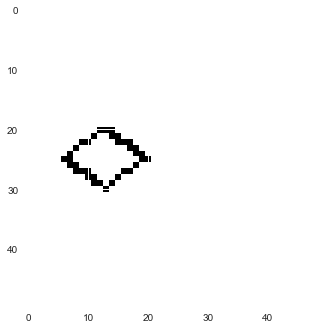

In [157]:
plt.imshow(D[16])
plt.show()

In [144]:
E = D.reshape(5000,-1)


In [145]:
F = np.ones((5000,1))

In [148]:
diamond= pd.DataFrame(E)

In [147]:
cat = pd.DataFrame(F)
cat.columns ={"cat"}

In [149]:
diamond = pd.merge(cat,square,left_index=True, right_index=True)

In [155]:
diamond.to_csv("diamond.csv")